In [1]:
import pandas as pd
import numpy as np 
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from textwrap import wrap

In [2]:
df_title = pd.read_csv('soc-redditHyperlinks-title.tsv', delimiter='\t')

In [3]:
df_body = pd.read_csv('soc-redditHyperlinks-body.tsv', delimiter='\t')

TypeError: reset_index() got an unexpected keyword argument 'name'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571927 entries, 0 to 571926
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   SOURCE_SUBREDDIT  571927 non-null  object
 1   TARGET_SUBREDDIT  571927 non-null  object
 2   POST_ID           571927 non-null  object
 3   TIMESTAMP         571927 non-null  object
 4   LINK_SENTIMENT    571927 non-null  int64 
 5   PROPERTIES        571927 non-null  object
 6   year              571927 non-null  int64 
 7   date              571927 non-null  object
 8   month             571927 non-null  int64 
 9   day               571927 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 43.6+ MB


In [4]:
source =['usa', 'america', 'us', 'unitedstates','usofa', 'unitedstatesofamerica', 'US','USA','USofA','UnitedStatesofAmerica', 'whitehouse', 'republican','democrats','WhiteHouse','Alabama','Alaska','Arizona','Arkansas','California','Colorado','Connecticut','Delaware','Florida','Georgia','Hawaii','Idaho','Illinois','Indiana','Iowa','Kansas','Kentucky','Louisiana','Maine','Maryland','Massachusetts','Michigan','Minnesota','Mississippi','Missouri','Montana','Nebraska','Nevada','New Hampshire','New Jersey','New Mexico','New York','North Carolina','North Dakota','Ohio','Oklahoma','Oregon','Pennsylvania','Rhode Island','South Carolina','South Dakota','Tennessee','Texas','Utah','Vermont','Virginia','Washington','West Virginia','Wisconsin','Wyoming']
target = ['guns','violence','black','muslin','islam','terrorism','crime','drugs','BLM','antivaccer','racewar','racism','shoot','riot','protest','assualt','suicide','kill','death','bomb','rape','sexual','bully','harass','porn']
pattern1 = '|'.join(source)
pattern2 = '|'.join(target)

In [282]:
source2 =['stock','wallstreet','bets']
target2 = ['guns','violence','terror','crime','drugs','BLM','antivaccer','shoot','riot','protest','assualt','suicide','kill','death','bomb','rape','sexual','bully','harass','kidnap','abduct']
crime_race = ['black','muslim','islam','racewar','racism','riot','protest','assualt','white','asian']
pattern11 = '|'.join(source2)
pattern2 = '|'.join(target2)
pattern3 =  '|'.join(crime_race)

In [270]:
df_graph= df_title.loc[(df_title['SOURCE_SUBREDDIT'].str.contains(pattern1,case=False)) & (df_title['TARGET_SUBREDDIT'].str.contains('politics',case=False))]

In [7]:
USA = df_title.loc[(df_title['SOURCE_SUBREDDIT'].str.contains(pattern1,case=False))]

In [283]:
america_crime = df_title.loc[(df_title['SOURCE_SUBREDDIT'].str.contains(pattern1,case=False)) & (df_title['TARGET_SUBREDDIT'].str.contains(pattern2,case=False))]

In [281]:
america_race = df_title.loc[(df_title['SOURCE_SUBREDDIT'].str.contains(pattern1,case=False)) & (df_title['TARGET_SUBREDDIT'].str.contains(pattern3,case=False))]

In [285]:
america_race.to_csv("race.csv")

In [284]:
america_crime.to_csv("crime_overall.csv")

In [207]:
df_911.to_csv("911_data.csv")

In [203]:
df_graph.to_csv("nodes.csv")

In [22]:
#new_frame=df_body.groupby('SOURCE_SUBREDDIT')


In [8]:
USA.to_csv("usa.csv")

In [23]:
source_list_body = df_body['SOURCE_SUBREDDIT']
source_list_body = source_list_body.unique().tolist()

In [24]:
target_list_body = df_body['TARGET_SUBREDDIT']
target_list_body = target_list_body.unique().tolist()

In [25]:
list_source_target = source_list_body
list_source_target.extend(target_list_body)

In [26]:
Vertices = list(dict.fromkeys(source_list_body))
Vertices.sort()
print("Unique Vertices -",len(Vertices))

Unique Vertices - 35776


In [27]:
x_edges = zip(df_body['SOURCE_SUBREDDIT'],df_body['TARGET_SUBREDDIT'])
Edge_list = list(x_edges)
Edges_list = list(dict.fromkeys(Edge_list))
print("Unique Edges -",len(Edges_list))

Unique Edges - 137821


In [28]:
vert = len(Vertices)

A_Mat = np.zeros((vert,vert),dtype=int)
for i in Edges_list:
    a = Vertices.index(i[0])
    b = Vertices.index(i[1])
    A_Mat[a][b]=1

In [29]:
#change code
Adj_list = list()
for s in range(vert):
    Adj_list.append([])

for i in Edges_list:
    a = Vertices.index(i[0])
    b = Vertices.index(i[1])

    Adj_list[a].append(i[1])

In [30]:
V_count = 0    
out_degree = dict()
cnt = list()
for i in range(len(Adj_list)):
    V_count = len(Adj_list[i])
    x = [Vertices[i],V_count]
    cnt.append(x)
    out_degree[Vertices[i]] = Adj_list[i]

In [31]:
def custom_clust(elem):
    return(elem[1])

def custom_func(elem):
    return(elem[1])

In [32]:
cnt.sort(key=custom_func,reverse=True)
cnt
cnt_new = cnt[:10]
popularName = [x[0] for x in cnt_new]
popularNo = [x[1] for x in cnt_new]
y_pos = np.arange(len(popularName))

In [33]:
popularName

['subredditdrama',
 'copypasta',
 'drama',
 'subredditoftheday',
 'outoftheloop',
 'circlejerkcopypasta',
 'tipofmypenis',
 'shitliberalssay',
 'justunsubbed',
 'conspiracy']

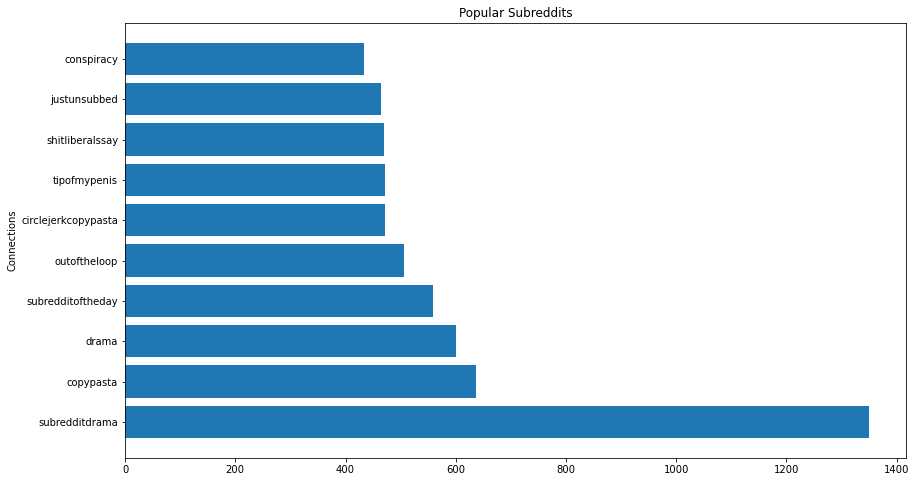

In [34]:
plt.figure(figsize=(14, 8))
plt.barh(popularName, popularNo)
#plt.bar(y_pos, popularNo, align='center', alpha=0.8,color='#F78F1E')
#plt.xticks(y_pos, popularName,rotation='vertical')
plt.ylabel('Connections')
plt.title('Popular Subreddits')
plt.show()

<ipython-input-35-4b0d455dae86>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(popularName, rotation=45)


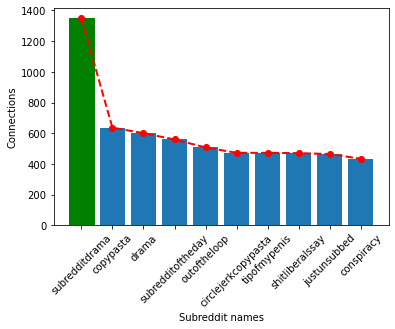

In [35]:
fig,ax= plt.subplots()
ax.bar(popularName, popularNo)[0].set_color("green")
ax.set_xticklabels(popularName, rotation=45)
ax.set_xlabel("Subreddit names")
ax.set_ylabel("Connections")
ax.plot(popularName,popularNo, color='red', marker ='o', linestyle = 'dashed', linewidth = 2)
plt.show()

In [36]:
new_frame = df_body.groupby(['SOURCE_SUBREDDIT','LINK_SENTIMENT']).size().reset_index(name='counts')
new_frame.sort_values('counts',ascending=False)

,SOURCE_SUBREDDIT,LINK_SENTIMENT,counts
26225,subredditdrama,1,3228
19677,outoftheloop,1,1820
5095,circlebroke,1,1656
24468,shitliberalssay,1,1561
5972,copypasta,1,1452
...,...,...,...
14322,kats_sexstories,1,1
14318,kateesackhoff,1,1
14317,kateeowen,1,1
14315,katastrophic,1,1


In [37]:
new_frame_positive = new_frame.loc[new_frame['LINK_SENTIMENT'] == 1]
new_frame_positive = new_frame_positive.sort_values('counts',ascending=False)

In [38]:
new_frame_negative = new_frame.loc[new_frame['LINK_SENTIMENT'] == -1]
new_frame_negative= new_frame_negative.sort_values('counts',ascending=False)

In [39]:
new_frame_positive=new_frame_positive.head(10)

In [40]:
new_frame_positive

,SOURCE_SUBREDDIT,LINK_SENTIMENT,counts
26225,subredditdrama,1,3228
19677,outoftheloop,1,1820
5095,circlebroke,1,1656
24468,shitliberalssay,1,1561
5972,copypasta,1,1452
11962,hailcorporate,1,1432
30951,writingprompts,1,1420
4044,buildapc,1,1304
28193,tipofmypenis,1,1201
5889,conspiracy,1,1181


In [41]:
new_frame_negative=new_frame_negative.head(10)

In [42]:
new_frame_negative

,SOURCE_SUBREDDIT,LINK_SENTIMENT,counts
26224,subredditdrama,-1,1437
5094,circlebroke,-1,702
8025,drama,-1,518
24467,shitliberalssay,-1,407
5114,circlejerkcopypasta,-1,380
5971,copypasta,-1,372
30950,writingprompts,-1,287
5888,conspiracy,-1,281
3041,bestofoutrageculture,-1,229
14282,karmacourt,-1,210


<BarContainer object of 10 artists>

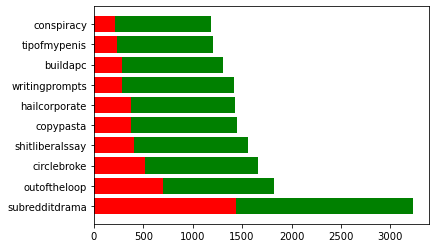

In [43]:
fig,ax= plt.subplots()
ax.barh(new_frame_positive['SOURCE_SUBREDDIT'],new_frame_positive['counts'],color='green')
ax.barh(new_frame_positive['SOURCE_SUBREDDIT'],new_frame_negative['counts'],color='red')

In [44]:
df_body['year'] = pd.DatetimeIndex(df_body['TIMESTAMP']).year
df_body['date']=pd.to_datetime(df_body['TIMESTAMP']).dt.date
df_body['month']=pd.to_datetime(df_body.TIMESTAMP,format='%Y-%m-%d %H:%M:%S').dt.month
df_body['day']=pd.to_datetime(df_body.TIMESTAMP,format='%Y-%m-%d %H:%M:%S').dt.day

In [45]:
df_body

,SOURCE_SUBREDDIT,TARGET_SUBREDDIT,POST_ID,TIMESTAMP,LINK_SENTIMENT,PROPERTIES,year,date,month,day
0,leagueoflegends,teamredditteams,1u4nrps,2013-12-31 16:39:58,1,"345.0,298.0,0.75652173913,0.0173913043478,0.08...",2013,2013-12-31,12,31
1,theredlion,soccer,1u4qkd,2013-12-31 18:18:37,-1,"101.0,98.0,0.742574257426,0.019801980198,0.049...",2013,2013-12-31,12,31
2,inlandempire,bikela,1u4qlzs,2014-01-01 14:54:35,1,"85.0,85.0,0.752941176471,0.0235294117647,0.082...",2014,2014-01-01,1,1
3,nfl,cfb,1u4sjvs,2013-12-31 17:37:55,1,"1124.0,949.0,0.772241992883,0.0017793594306,0....",2013,2013-12-31,12,31
4,playmygame,gamedev,1u4w5ss,2014-01-01 02:51:13,1,"715.0,622.0,0.777622377622,0.00699300699301,0....",2014,2014-01-01,1,1
...,...,...,...,...,...,...,...,...,...,...
286556,negareddit,debatefascism,68im20s,2017-04-30 16:31:26,1,"441.0,405.0,0.775510204082,0.0294784580499,0.0...",2017,2017-04-30,4,30
286557,mildlynomil,justnomil,68imlas,2017-04-30 04:19:03,1,"2226.0,1855.0,0.786163522013,0.00224618149146,...",2017,2017-04-30,4,30
286558,mmorpg,blackdesertonline,68ip5os,2017-04-30 16:54:08,1,"1100.0,909.0,0.778181818182,0.00181818181818,0...",2017,2017-04-30,4,30
286559,electricskateboards,askreddit,68ipb2s,2017-04-30 16:41:53,1,"1876.0,1567.0,0.78144989339,0.00692963752665,0...",2017,2017-04-30,4,30


In [46]:
year_2013 = df_body[df_body.year == 2013] 
dec_2013 = year_2013[year_2013.month==12]
year_2013_new = dec_2013[dec_2013.day==31]
len(year_2013_new)

7

In [47]:
year_2014 = df_body[df_body.year == 2014] 
dec_2014 = year_2014[year_2014.month==12]
year_2014_new = dec_2014[dec_2014.day==31]
len(year_2014_new)

160

In [48]:
year_2015 = df_body[df_body.year == 2015] 
last_month_2015 = year_2015[year_2015.month==12]
year_2015_new = last_month_2015[last_month_2015.day==31]
len(year_2015_new)

250

In [49]:
year_2016 = df_body[df_body.year == 2016] 
last_month_2016 = year_2016[year_2016.month==12]
year_2016_new = last_month_2016[last_month_2016.day==31]
len(year_2016_new)

216

In [50]:
years_len = [len(year_2013_new),len(year_2014_new),len(year_2015_new),len(year_2016_new)]
years = ['2013','2014','2015','2016']

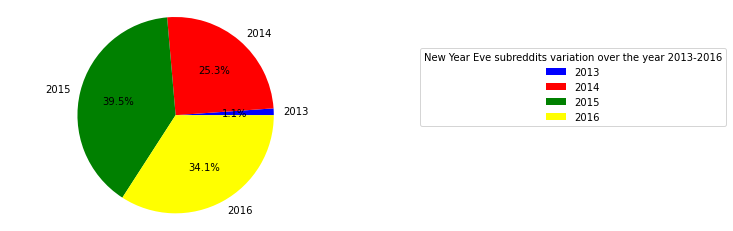

In [51]:
colors = ["blue", "red", "green", "yellow"]
plt.pie(years_len, colors=colors, labels=years, startangle=0, autopct='%.1f%%')
plt.axis('equal')
plt.legend(years ,title="New Year Eve subreddits variation over the year 2013-2016", bbox_to_anchor=(1.8,0.6),loc='right', bbox_transform=plt.gcf().transFigure)
plt.show()

In [52]:
df_title['year'] = pd.DatetimeIndex(df_title['TIMESTAMP']).year
df_title['date']=pd.to_datetime(df_title['TIMESTAMP']).dt.date
df_title['month']=pd.to_datetime(df_title.TIMESTAMP,format='%Y-%m-%d %H:%M:%S').dt.month
df_title['day']=pd.to_datetime(df_title.TIMESTAMP,format='%Y-%m-%d %H:%M:%S').dt.day

In [53]:
year_2013_title = df_title[df_title.year == 2013] 
dec_2013_title = year_2013_title[year_2013_title.month==12]
year_2013_title = dec_2013_title[dec_2013_title.day==31]
len(year_2013_title)

27

In [54]:
year_2014_title = df_title[df_title.year == 2014] 
dec_2014_title = year_2014_title[year_2014_title.month==12]
year_2014_title = dec_2014_title[dec_2014_title.day==31]
len(year_2014_title)

343

In [55]:
year_2015_title = df_title[df_title.year == 2015] 
dec_2015_title = year_2015_title[year_2015_title.month==12]
year_2015_title = dec_2015_title[dec_2015_title.day==31]
len(year_2015_title)

425

In [56]:
year_2016_title = df_title[df_title.year == 2016] 
dec_2016_title = year_2016_title[year_2016_title.month==12]
year_2016_title = dec_2016_title[dec_2016_title.day==31]
len(year_2016_title) 

515

In [57]:
years_len_title = [len(year_2013_title),len(year_2014_title),len(year_2015_title),len(year_2016_title)]


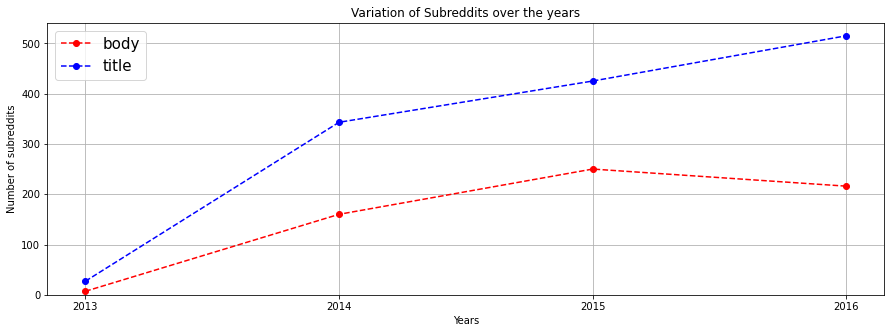

In [58]:
fig, ax1 = plt.subplots(figsize=(15,5))
ax1.plot(years,years_len, "r-o",linestyle='dashed', label = 'body')
ax1.plot(years,years_len_title, "b-o",linestyle='dashed', label = 'title')
ax1.set_ylim(0,)
ax1.grid(None)
ax1.legend(loc="upper left", fontsize = 15)
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of subreddits');

plt.title('Variation of Subreddits over the years')
plt.show()